# Part I. Root-finding. Newton's iteration.

Write a function which performs Newton's iteration for a given function $f(x)$ with known derivative $f'(x)$. Your function should find the root of $f(x)$ with a predefined absolute accuracy $\epsilon$. 

In [25]:
def newton_iteration(f, fder, x0, eps=1e-5, maxiter=1000):
    """Find a root of $f(x) = 0$ via Newton's iteration starting from x0.
    
    Parameters
    ----------
    f : callable
        The function to find a root of.
    fder : callable
        The derivative of `f`.
    x0 : float
        Initial value for the Newton's iteration.
    eps : float
        The target accuracy. 
        The iteration stops when the distance between successive iterates is below `eps`.
        Default is 1e-5.
    maxiter : int
        The maximum number of iterations (default is 1000.)
        Iterations terminate if the number of iterations exceeds `maxiter`.
        This parameter is only needed to avoid infinite loops if iterations wander off.
        
    Returns
    -------
    x : float
        The estimate for the root.
    niter : int
        The number of iterations.
    """
    # ... ENTER YOUR CODE HERE ...
    xn = x0
    niter=0
    for i in range(0,maxiter):
        xpr = xn - f(xn)/fder(xn)
        niter += 1
        if (abs(xn - xpr) < eps):
            break
        xn = xpr
    return xpr, niter

### Test I.1 

Test your implementation on a simple example, $f(x) = x^2 - 1$ or similar. (20% of the total grade)

In [26]:
newton_iteration(lambda x: x**2 - 1, lambda x: 2*x, 1e-5)

(1.0, 21)

### Test I.2

Now consider a function which has a multiple root. Take $f(x) = (x^2 - 1)^2$ as an example. Implement a modified Newton's iteraion,

$$
x_{n+1} = x_{n} - m \frac{f(x_n)}{f'(x_n)}
$$

and vary $m= 1, 2, 3, 4, 5$. Check the number of iterations required for convergence within a fixed $\epsilon$. Are your observations consistent with the expectation that the convergence is quadratic is $m$ equals the multiplicity of the root, and is linear otherwise? (40% of the total grade)

In [30]:
# ... ENTER YOUR CODE HERE ...
def newton(f, fder, x0, m, eps=1e-5, maxiter=1000):
    xn = x0
    niter = 0
    for i in range(maxiter):
        xpr = xn - m*f(xn)/fder(xn)
        niter += 1
        if (abs(xn - xpr) < eps):
            break
        xn = xpr
    return xpr, niter


In [32]:
for i in range(1,6):
    print(newton(lambda x: (x**2 - 1)**2, lambda x: 4*(x**3 - x), 2, i,eps=1e-5, maxiter=1000))

(1.0000078296573287, 18)
(1.0000000000000009, 5)
(0.9999978588127855, 17)
(2.0, 1000)
(-1.4359563234755968, 1000)


# Part II. Fixed-point iteration

Consider the following equation:

$$
\sqrt{x} = \cos{x}
$$

Plot the left-hand side and right-hand side of this equation, and localize the root graphically. Estimate the location of the root by visual inspection of the plot.

Write a function which finds the solution using fixed-point iteration up to a predefined accuracy $\epsilon$. Compare the result to an estimate from a visual inspection.

Next, rewrite the fixed-point problem in the form

$$
x = x - \alpha f(x)
$$

where $\alpha$ is the free parameter. Check the dependence of the number of iterations required for a given $\epsilon$ on $\alpha$. Compare your results to an expectation that the optimal value of $\alpha$ is given by 

$$
\alpha = \frac{2}{m + M}
$$

where $0 < m < |f'(x)| < M$ over the localization interval. (40% of the total grade)

(0.6417096522788986, 242)


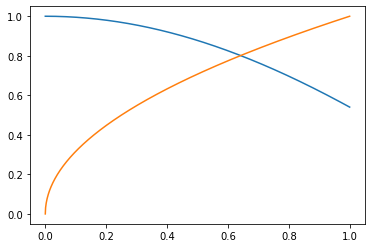

In [59]:
# ... ENTER YOUR CODE HERE ...
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0, 1, 1000)
y1 = np.cos(x)
y2 = np.sqrt(x)
fig, z = plt.subplots()
z.plot(x, y1)
z.plot(x, y2)


def point(f,x0, eps=1e-5, maxiter=1000):
    xn = x0
    for i in range(maxiter):
        xi = f(xn)
        if abs(xi-xn)<eps:
            break
        xn = xi
    return (xi, i+1)
 
print(point(lambda x: 0.5*(1+np.cos(2*x)),0.5))
plt.show()

In [62]:
def modified(f,x0, alpha, eps=1e-5, maxiter=1000):
    xn = x0
    for i in range(maxiter):
        xpr = xn-alpha*( f(xn)) 
        if abs(xn-xpr)<eps:
            break
        xn = xpr
    return xpr, i


# Part III. Newton's fractal.

(Not graded). 

Consider the equation

$$
x^3 = 1
$$

It has three solutions in the complex plane, $x_k = \exp(i\, 2\pi k/ 3)$, $k = 0, 1, 2$.

The Newton's iterations converge to one of these solutions, depending on the starting point in the complex plane (to converge to a complex-valued solution, the iteration needs a complex-valued starting point).

Plot the \emph{basins of attraction} of these roots on the complex plane of $x$ (i.e., on the plane $\mathrm{Re}x$ -- $\mathrm{Im}x$). To this end, make a series of calculations, varying the initial conditions on a grid of points. 
Color the grid in three colors, according to the root, to which iterations converged.